In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
import statsmodels.api as sm

Matplotlib is building the font cache; this may take a moment.


In [ ]:
# Load all of the cleaed datasets
gdp = pd.read_csv('/Users/xipuwang/Downloads/qtm350_project/data/cleaned_gdp.csv').drop(columns=['Unnamed: 0', 'Unnamed: 0.1'], errors='ignore')
growth = pd.read_csv('/Users/xipuwang/Downloads/qtm350_project/data/cleaned_growth.csv').drop(columns=['Unnamed: 0', 'Unnamed: 0.1'], errors='ignore')
employment = pd.read_csv('/Users/xipuwang/Downloads/qtm350_project/data/cleaned_employment.csv').drop(columns=['Unnamed: 0', 'Unnamed: 0.1'], errors='ignore')
ppp = pd.read_csv('/Users/xipuwang/Downloads/qtm350_project/data/cleaned_ppp.csv').drop(columns=['Unnamed: 0', 'Unnamed: 0.1'], errors='ignore')

In [ ]:
# Merge by countries
gdp = gdp.drop(columns='index')
growth = growth.drop(columns='index')
employment = employment.drop(columns='index')
ppp = ppp.drop(columns='index')
df = gdp.merge(growth, on=['country','date'], how='inner')
df = df.merge(employment, on=['country','date'], how='inner')
df = df.merge(ppp, on=['country','date'], how='inner')

In [10]:
# Using log GDP
df['log_gdp_per_capita'] = np.log(df['gdp_per_capita'])

              gdp_growth                                                    \
                   count      mean       std       min       25%       50%   
country                                                                      
Canada              33.0  2.188426  2.194523 -5.038233  1.688961  2.657707   
Mexico              33.0  2.171934  3.496280 -8.624556  1.185545  2.755030   
United States       33.0  2.468738  1.771526 -2.576500  1.935496  2.684431   

                                    ppp                ... log_gdp_per_capita  \
                    75%       max count          mean  ...                75%   
country                                                ...                      
Canada         3.137194  5.286957  33.0  49779.761596  ...          10.681696   
Mexico         3.975905  7.198876  33.0  20518.835186  ...           9.202378   
United States  3.522497  5.800206  33.0  58707.209749  ...          10.951512   

                         employment         

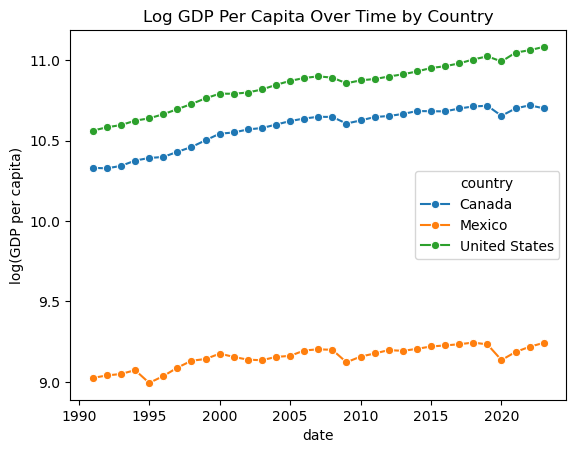

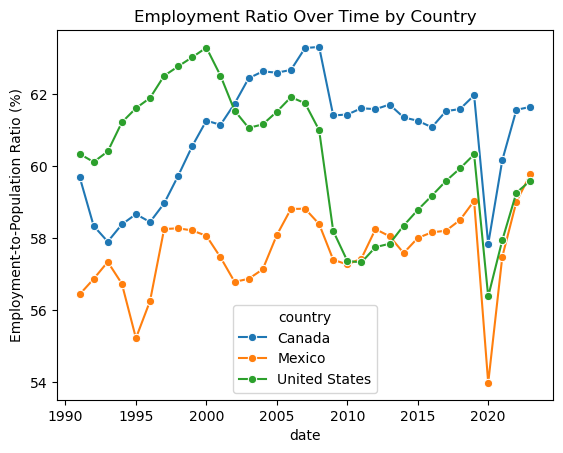

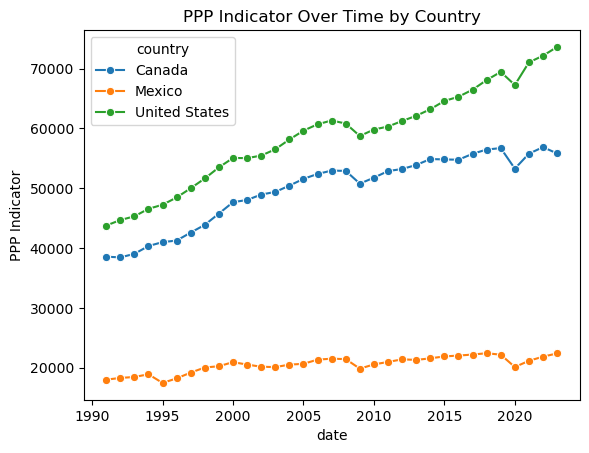

In [29]:
# Overview of all the data
import seaborn as sns
import matplotlib.pyplot as plt

stats = df.groupby('country')[['gdp_growth', 'ppp', 'log_gdp_per_capita', 'employment']].describe()
print(stats)
# Trend of Log GDP Per Capita Over Time by Country
sns.lineplot(data=df, x='date', y='log_gdp_per_capita', hue='country', marker='o')
plt.title('Log GDP Per Capita Over Time by Country')
plt.ylabel('log(GDP per capita)')
plt.show()

# Trend of Employment Over Time by Country
sns.lineplot(data=df, x='date', y='employment', hue='country', marker='o')
plt.title('Employment Ratio Over Time by Country')
plt.ylabel('Employment-to-Population Ratio (%)')
plt.show()

# Trend of PPP Over Time by Country
sns.lineplot(data=df, x='date', y='ppp', hue='country', marker='o')
plt.title('PPP Indicator Over Time by Country')
plt.ylabel('PPP Indicator')
plt.show()


These summary statistics give us a comparative snapshot of three key North American economies—Canada, Mexico, and the United States—across several indicators: GDP growth, PPP (purchasing power parity), log GDP per capita, and employment.

GDP Growth:
All three countries have similar mean GDP growth rates, with the U.S. leading slightly at about 2.47%, followed by Canada at 2.19%, and Mexico at 2.17%. However, Mexico’s growth is notably more volatile, as indicated by a higher standard deviation (3.50) and more extreme minimum (-8.62%) and maximum (7.20%) values. Canada and the United States have smaller standard deviations and narrower ranges, suggesting more stable year-to-year growth. But we see a large change on the plot around 2010, 2020. This is caused by the 2008 financial crisis and COVID-19 pandemic in 2020, which are factors that have heavily affected other variables as well.

PPP and Log GDP Per Capita:
The U.S. has the highest average PPP value (around 58,707) and the largest values of log GDP per capita, followed by Canada, then Mexico, reflecting a clear hierarchy in terms of wealth and price levels. Canada's PPP averages around 49,780, while Mexico’s is significantly lower at around 20,519. These differences in levels are similarly mirrored in the log GDP per capita data, where the U.S. again tops the list, indicating a wealthier economic environment.

Employment:
In terms of labor market outcomes, both Canada and the United States show higher average employment-to-population ratios (around 60-61%) compared to Mexico’s average of about 57.6%. While all three countries maintain relatively stable employment rates, the smaller standard deviation for Mexico (1.14) suggests that its employment ratio is more consistently clustered around its mean, albeit at a lower level.

Overall Picture:
In summary, the U.S. stands out as the wealthiest with the highest PPP and log GDP per capita and stable, moderately strong growth. Canada shares these characteristics to a somewhat lesser extent, while Mexico’s economic indicators point to lower average wealth and more volatile growth rates. Although all three countries are economically developed, these statistics underline important differences in stability, living standards, and labor market conditions.

                    log_gdp_per_capita  gdp_growth  employment       ppp
log_gdp_per_capita            1.000000    0.029930    0.640858  0.977729
gdp_growth                    0.029930    1.000000    0.244149  0.019767
employment                    0.640858    0.244149    1.000000  0.577248
ppp                           0.977729    0.019767    0.577248  1.000000


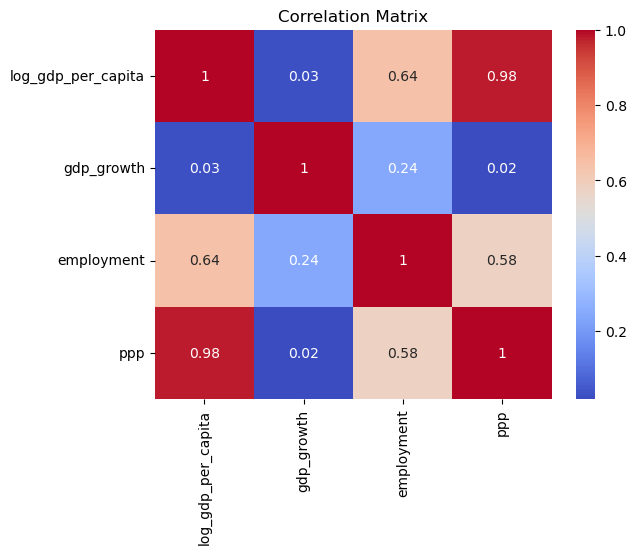

In [ ]:
# Correlation Analysis
corr_vars = ['log_gdp_per_capita', 'gdp_growth', 'employment', 'ppp']
corr_matrix = df[corr_vars].corr()
print(corr_matrix)

# Visualize correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

The correlation results indicate that there is a very close relationship between log GDP per capita and PPP, as well as a reasonably strong link between both these indicators and employment. In other words, wealthier countries (as measured by higher GDP per capita) typically have higher purchasing power parity and tend to be associated with greater employment. On the other hand, GDP growth does not appear to be strongly related to these measures of wealth and prices. The correlation between GDP growth and log GDP per capita, as well as GDP growth and PPP, is essentially zero, suggesting that a country’s short-term economic growth rate does not reliably align with its overall wealth level or cost-of-living conditions. While there is a modest positive relationship between growth and employment, it is not as strong as the connections found between the indicators of wealth and employment, or wealth and PPP. In sum, countries’ relative wealth and market conditions tend to move together, while their immediate growth rates may vary independently.

In [13]:
growth_stats = df.groupby('country')['gdp_growth'].describe()
growth_stats

,count,mean,std,min,25%,50%,75%,max
country,,,,,,,,
Canada,33.0,2.188426,2.194523,-5.038233,1.688961,2.657707,3.137194,5.286957
Mexico,33.0,2.171934,3.496280,-8.624556,1.185545,2.755030,3.975905,7.198876
United States,33.0,2.468738,1.771526,-2.576500,1.935496,2.684431,3.522497,5.800206


These summary statistics show how GDP growth rates differ among the three countries over the sampled period. Each has 33 observations, but the distributions vary in their central tendency and variability. The United States has the highest average growth rate at about 2.47%, followed by Canada at 2.19%, and Mexico at 2.17%. However, the U.S. and Canada also exhibit lower volatility, as indicated by smaller standard deviations (1.77% for the U.S. and 2.19% for Canada) and narrower ranges. Mexico’s growth rate, on the other hand, is more volatile, with a standard deviation of 3.50% and a much wider spread between its minimum (-8.62%) and maximum (7.20%) values. In other words, while Mexico’s average growth is similar to that of Canada and the U.S., its economic growth experiences much sharper fluctuations over time.

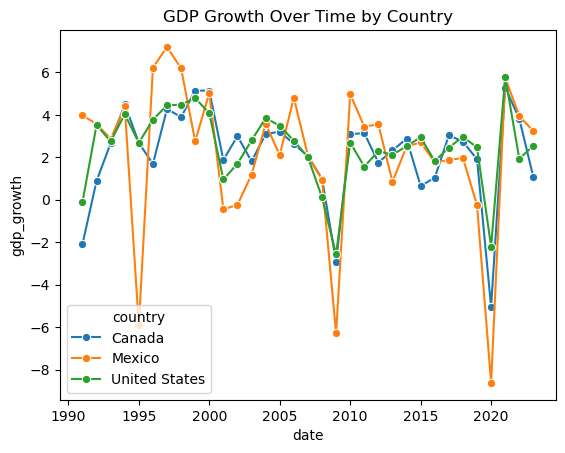

In [15]:
sns.lineplot(data=df, x='date', y='gdp_growth', hue='country', marker='o')
plt.title('GDP Growth Over Time by Country')
plt.show()

country          Canada    Mexico  United States
country                                         
Canada         1.000000  0.642125       0.849548
Mexico         0.642125  1.000000       0.724264
United States  0.849548  0.724264       1.000000


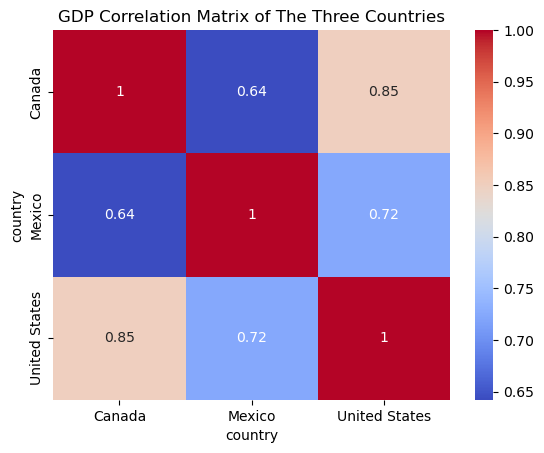

In [23]:
df_wide = df.pivot(index='date', columns='country', values='gdp_growth')
correlation_matrix = df_wide.corr()
print(correlation_matrix)

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('GDP Correlation Matrix of The Three Countries')
plt.show()

In [22]:
from scipy.stats import pearsonr

# Extract series
canada = df_wide['Canada'].dropna()
mexico = df_wide['Mexico'].dropna()
us = df_wide['United States'].dropna()

# Compute Pearson correlations and p-values
corr_can_mex, p_can_mex = pearsonr(canada, mexico)
corr_can_us, p_can_us = pearsonr(canada, us)
corr_mex_us, p_mex_us = pearsonr(mexico, us)

print(f"Canada-Mexico correlation: {corr_can_mex:.3f}, p-value: {p_can_mex:.9f}")
print(f"Canada-United States correlation: {corr_can_us:.3f}, p-value: {p_can_us:.9f}")
print(f"Mexico-United States correlation: {corr_mex_us:.3f}, p-value: {p_mex_us:.9f}")

Canada-Mexico correlation: 0.642, p-value: 0.000056184
Canada-United States correlation: 0.850, p-value: 0.000000000
Mexico-United States correlation: 0.724, p-value: 0.000001891


This correlation matrix suggests that the GDP growth rates of all three countries—Canada, Mexico, and the United States—tend to move in the same direction over time. Canada’s growth rate is strongly correlated with that of the United States (0.85), indicating that when the U.S. economy grows faster, Canada’s economy often does as well. Mexico’s growth rate is also positively associated with both Canada (0.64) and the United States (0.72), albeit not as strongly as the Canada–U.S. relationship. Overall, all three countries’ growth rates appear interconnected, with the closest alignment found between Canada and the United States. The extremely low p-values for all pairs (far below conventional significance thresholds) confirm that these correlations are unlikely to be due to chance. In short, these three North American economies tend to experience similar directions in their economic growth patterns, with the U.S. and Canada being particularly closely aligned.

In [16]:
us_growth = df.loc[df['country'] == 'United States', 'gdp_growth'].dropna()
can_growth = df.loc[df['country'] == 'Canada', 'gdp_growth'].dropna()
mex_growth = df.loc[df['country'] == 'Mexico', 'gdp_growth'].dropna()

# Two-sample t-test for difference in means
t_stat_can, p_val_can = ttest_ind(us_growth, can_growth, equal_var=False, nan_policy='omit')
t_stat_mex, p_val_mex = ttest_ind(us_growth, mex_growth, equal_var=False, nan_policy='omit')

print(f"US vs Canada: t-stat={t_stat_can:.3f}, p-value={p_val_can:.3f}")
print(f"US vs Mexico: t-stat={t_stat_mex:.3f}, p-value={p_val_mex:.3f}")

US vs Canada: t-stat=0.571, p-value=0.570
US vs Mexico: t-stat=0.435, p-value=0.666


The t-tests comparing U.S. GDP growth rates to those of Canada and Mexico show no statistically significant differences. In the U.S.–Canada comparison, the t-statistic is 0.571 with a p-value of 0.570, and for the U.S.–Mexico comparison, the t-statistic is 0.435 with a p-value of 0.666. Both p-values are well above common significance thresholds (like 0.05), indicating that we cannot reject the null hypothesis of equal average growth rates.

In practical terms, these results suggest that, based on the data at hand, the United States does not have a statistically distinct mean GDP growth rate from either Canada or Mexico. Their average growth rates are statistically comparable, and any observed differences are likely due to random variation rather than a meaningful economic distinction.

In [17]:
# Predict gdp_growth using log GDP, employment ratio, and PPP
model_data = df.dropna(subset=['gdp_growth','log_gdp_per_capita','employment', 'ppp'])
X = model_data[['log_gdp_per_capita', 'employment', 'ppp']]
y = model_data['gdp_growth']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             gdp_growth   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     3.092
Date:                Sun, 08 Dec 2024   Prob (F-statistic):             0.0307
Time:                        18:53:49   Log-Likelihood:                -228.83
No. Observations:                  99   AIC:                             465.7
Df Residuals:                      95   BIC:                             476.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -12.8413     13

This regression model suggests that while the overall relationship between GDP growth and the three predictors—log GDP per capita, employment ratio, and PPP—is statistically significant at the model level (F-test p-value ≈ 0.031), the explanatory power is quite low. With an R-squared of only about 0.089, the model explains less than 10% of the variation in GDP growth.

Looking at individual predictors, only the employment variable shows a statistically significant positive effect on GDP growth (p < 0.01). Neither log GDP per capita nor PPP emerges as a meaningful predictor, as their coefficients are not statistically different from zero. In other words, variation in employment is somewhat associated with changes in GDP growth, whereas wealth level (log GDP per capita) and purchasing power (PPP) do not appear to have a clear, direct influence.

The large condition number (2.53e+06) indicates potential multicollinearity or numerical instability. This might mean that the predictors are highly correlated with each other, making it difficult to isolate their individual effects. Additionally, the non-normal distribution of residuals (as indicated by the significant Omnibus and Jarque-Bera tests) suggests that certain regression assumptions may be violated, and thus the results should be interpreted with caution.

In summary, the model only modestly explains the variation in GDP growth, with employment showing some predictive power, but the presence of multicollinearity and non-normal residuals highlights the need for more careful modeling or additional variables.

In [19]:
df = df.sort_values(by=['country', 'date'])
df['lag_gdp'] = df.groupby('country')['log_gdp_per_capita'].shift(1)

lag_model_data = df.dropna(subset=['gdp_growth','lag_gdp','employment', 'ppp'])
X_lag = lag_model_data[['lag_gdp', 'employment', 'ppp']]
y_lag = lag_model_data['gdp_growth']

X_lag = sm.add_constant(X_lag)
lag_model = sm.OLS(y_lag, X_lag).fit()
print(lag_model.summary())

                            OLS Regression Results                            
Dep. Variable:             gdp_growth   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                  0.101
Method:                 Least Squares   F-statistic:                     4.574
Date:                Sun, 08 Dec 2024   Prob (F-statistic):            0.00495
Time:                        18:54:49   Log-Likelihood:                -219.05
No. Observations:                  96   AIC:                             446.1
Df Residuals:                      92   BIC:                             456.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.0825     13.928     -0.150      0.8

This revised model (that uses GDP of last year instead of this year) explains slightly more variation in GDP growth than the previous one (R-squared of about 0.13, up from 0.089), indicating that around 13% of the variation in GDP growth is accounted for by the included variables: lagged GDP, employment, and PPP. The overall model is statistically significant (p ≈ 0.005), suggesting that the combination of predictors is not random noise.

Looking at the individual coefficients, employment is again the clearest and most statistically significant predictor. Its positive and significant coefficient (p < 0.001) suggests that higher employment ratios are strongly associated with higher GDP growth. The lagged GDP variable (lag_gdp) is marginally significant at the 0.059 level, suggesting a weak negative relationship with current growth—countries that had higher GDP in the previous period might experience slightly lower subsequent growth rates, but this relationship is not definitively supported at conventional significance levels.

The PPP variable still does not reach statistical significance (p = 0.14), indicating that changes in PPP alone do not strongly predict GDP growth. Despite the improvement in fit, the large condition number (2.64e+06) and non-normality of residuals (significant Omnibus and Jarque-Bera tests) remain issues. These results point to potential multicollinearity among the predictors or structural issues in the model. In other words, while adding a lagged GDP variable provides a bit more insight, the model still struggles with explanatory power and stability, and further refinement or additional variables may be necessary for a clearer understanding of what drives GDP growth.